# Custom Keras Model

In [1]:
from skin_func import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimgb

from PIL import Image

In [2]:
from tensorflow.python.client import device_lib

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4130722766415885588
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15966665875516335775
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5037731773743004977
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11235482010
locality {
  bus_id: 1
  links {
  }
}
incarnation: 766322336743786282
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [4]:
import keras

Using TensorFlow backend.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D, Dropout

In [6]:
meta_df = pd.read_csv("HAM10000_metadata.csv")
print(meta_df.shape)
meta_df.head()

(10015, 8)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_value
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2


In [7]:
sorted(meta_df.dx.unique())

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [8]:
melanoma = []

for i in range((meta_df.shape[0])):
    # mel_y = ['mel', 'nv']
    # mel_n = ['akiec', 'bcc', 'bkl', 'df', 'vasc']
    
    if (meta_df.loc[i][2] == 'mel') or (meta_df.loc[i][2] == 'nv'):
        melanoma.append(1)
    else:
        melanoma.append(0)

In [9]:
meta_df['melanoma'] = melanoma

In [10]:
meta_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_value,melanoma
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,0


## Images

In [11]:
image_path = 'Image_data/Images_Original/'
X, y = image_to_nparray(meta_df, image_path, new_image_size=(224, 224))

Progress:0.0%
Progress:5.0%
Progress:10.0%
Progress:15.0%
Progress:20.0%
Progress:25.0%
Progress:30.0%
Progress:35.0%
Progress:40.0%
Progress:45.0%
Progress:50.0%
Progress:55.0%
Progress:60.0%
Progress:65.0%
Progress:70.0%
Progress:75.0%
Progress:80.0%
Progress:85.0%
Progress:90.0%
Progress:95.0%
Progress:100.0%


In [12]:
X = np.asarray(X)

In [13]:
X.shape

(10015, 224, 224, 3)

In [14]:
y = meta_df['melanoma']

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [17]:
print(f"X_tv {X_tv.shape} | X_test {X_test.shape} | y_tv {y_tv.shape} | y_test {y_test.shape}")

X_tv (7511, 224, 224, 3) | X_test (2504, 224, 224, 3) | y_tv (7511,) | y_test (2504,)


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=.25, random_state=42)
print(f"X_train {X_train.shape} | X_val {X_val.shape} | y_train {y_train.shape} | y_val {y_val.shape}")

X_train (5633, 224, 224, 3) | X_val (1878, 224, 224, 3) | y_train (5633,) | y_val (1878,)


Lesion type: 1


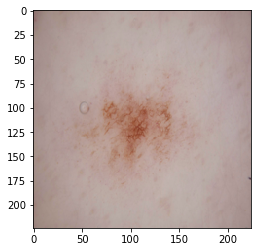

In [19]:
print("Lesion type:", list(y_train)[0])
plt.imshow(X_train[0])
plt.show()

## Catagorize target

In [25]:
from keras.utils import to_categorical

# one_hot_encoding to target colum
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [26]:
# y_train[0]

# Model

In [27]:
# Initialize Model
model = Sequential()

# 1 Covolutional/Pooling layer + Input(224,244) as of VGG16
model.add(Conv2D(224, kernel_size=(3,3), strides=1, activation='relu', padding='valid', input_shape=(224,224,3)))
model.add(Conv2D(224, kernel_size=(3,3), strides=1, activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# 2 Covolutional/Pooling layer
model.add(Conv2D(112, kernel_size=(3,3), strides=1, activation='relu', padding='valid'))
model.add(Conv2D(112, kernel_size=(3,3), strides=1, activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# 3 Covolutional/Pooling layer
model.add(Conv2D(56, kernel_size=(3,3), strides=1, activation='relu', padding='valid'))
model.add(Conv2D(56, kernel_size=(3,3), strides=1, activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# 4 Flatterning layer
model.add(Flatten())

# 5 First Recombination
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.1))

# 6 Second Recombination
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.1))

# Output Dense layer  (3 for classes = 0-2 | `bkl`, `mel`, `nv`) or (7 for all classes = 0-6)
model.add(Dense(2, activation='softmax'))

# Complie CNN
model.compile(optimizer='adam', metrics=['categorical_accuracy'], loss='categorical_crossentropy')
          

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 224)     6272      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 224)     451808    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 224)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 112)     225904    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 112)     113008    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 112)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 51, 51, 56)       

In [29]:
checkpath = 'skin_model_best.h5'

history = model.fit(X_train, y_train, 
          batch_size=32, 
          epochs= 30, 
          validation_data=(X_val, y_val), 
          callbacks=[keras.callbacks.EarlyStopping(patience=7), 
                    keras.callbacks.ModelCheckpoint(checkpath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True)])

Train on 5633 samples, validate on 1878 samples
Epoch 1/30
5633/5633 [==============================] - 522s 93ms/step - loss: 2.5421 - categorical_accuracy: 0.7415 - val_loss: 0.4554 - val_categorical_accuracy: 0.7790
Epoch 2/30
5633/5633 [==============================] - 498s 88ms/step - loss: 0.4218 - categorical_accuracy: 0.7788 - val_loss: 0.3990 - val_categorical_accuracy: 0.7790
Epoch 3/30
5633/5633 [==============================] - 492s 87ms/step - loss: 0.4185 - categorical_accuracy: 0.7786 - val_loss: 0.4171 - val_categorical_accuracy: 0.7790
Epoch 4/30
5633/5633 [==============================] - 492s 87ms/step - loss: 0.3947 - categorical_accuracy: 0.7804 - val_loss: 0.4073 - val_categorical_accuracy: 0.7790
Epoch 5/30
5633/5633 [==============================] - 491s 87ms/step - loss: 0.3841 - categorical_accuracy: 0.7903 - val_loss: 0.4348 - val_categorical_accuracy: 0.7934
Epoch 6/30
5633/5633 [==============================] - 492s 87ms/step - loss: 0.4062 - categoric

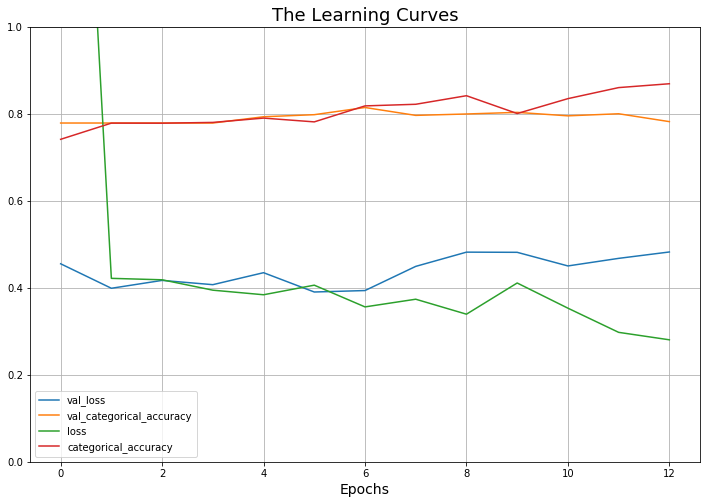

In [31]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0,1]
plt.title("The Learning Curves", fontsize=18)
plt.xlabel("Epochs", fontsize=14)
plt.show()

In [32]:
model.save("skin_model_2.h5")

## Model Evaluation

In [33]:
# load and evaluate a saved model
from keras.models import load_model
model = load_model("skin_model_best.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 224)     6272      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 224)     451808    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 224)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 112)     225904    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 112)     113008    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 112)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 51, 51, 56)       

In [34]:
y_pred = model.predict(X_val, batch_size=100, verbose=0)
y_prob = model.predict_proba(X_val, batch_size=100, verbose=0)
y_pred_c = model.predict_classes(X_val, batch_size=100, verbose=0)


 clasification report:
               precision    recall  f1-score   support

non-melanoma       0.58      0.58      0.58       415
    melanoma       0.88      0.88      0.88      1463

    accuracy                           0.81      1878
   macro avg       0.73      0.73      0.73      1878
weighted avg       0.81      0.81      0.81      1878

-----------------------------------------------


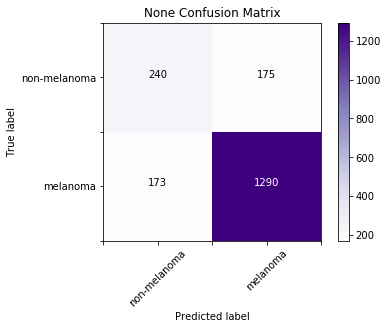

In [35]:
plot_confusion_matrix(y_val[:,1], y_pred_c, ['non-melanoma', 'melanoma'])

ROC Curve

In [36]:
def roc_plot(y_train, train_prob, y_val, val_prob):
    """ Plot the roc curve for model"""

    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    
    #Getting the best threshold
    threshold_chosen = 0
    difference = 0
    for i in range(len(threshold)):
        temp = tpr[i]-fpr[i]
        if temp>difference:
            difference=temp
            threshold_chosen=threshold[i]
    threshold_chosen = round(threshold_chosen,2)
    print('Best Threshold =',threshold_chosen)
    
    #Plot the ROC_Curve
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [37]:
train_prob = model.predict_proba(X_train, batch_size=100, verbose=0)

Best Threshold = 0.76


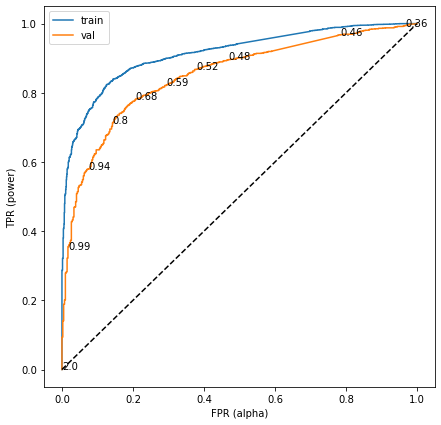

In [38]:
roc_plot(y_train[:,1], train_prob[:,1], y_val[:,1], y_prob[:,1])

Precision Recall Curve

In [32]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val[:,1], y_prob[:,1])

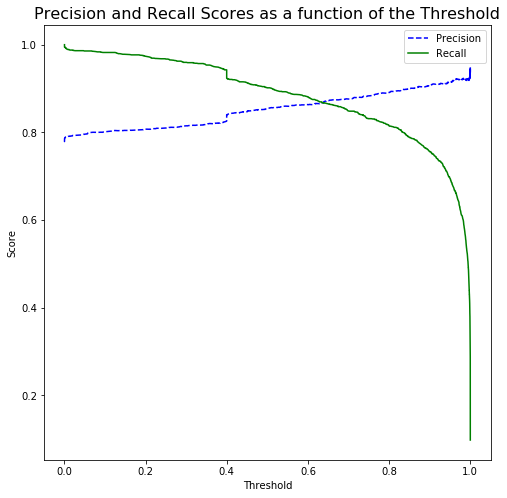

In [33]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

# Test Data Evaluation

In [52]:
y_pred_test = model.predict(X_test, batch_size=100, verbose=0)[:,1]
y_prob_test = model.predict_proba(X_test, batch_size=100, verbose=0)[:,1]
y_pred_c_test = model.predict_classes(X_test, batch_size=100, verbose=0)

Best Threshold = 0.75


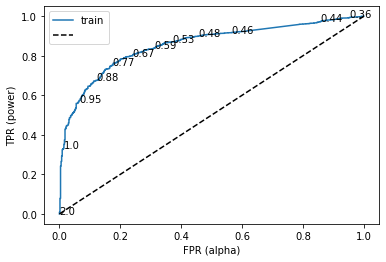

In [53]:
fpr, tpr, threshold = roc_curve(y_test[:,1], y_prob_test)
plt.plot(fpr, tpr)
annot(fpr, tpr, threshold)

#Getting the best threshold
threshold_chosen = 0
difference = 0
for i in range(len(threshold)):
    temp = tpr[i]-fpr[i]
    if temp>difference:
        difference=temp
        threshold_chosen=threshold[i]
threshold_chosen = round(threshold_chosen,2)
print('Best Threshold =',threshold_chosen)

#Plot the ROC_Curve
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('TPR (power)')
plt.xlabel('FPR (alpha)')
plt.legend(['train',''])
plt.show()

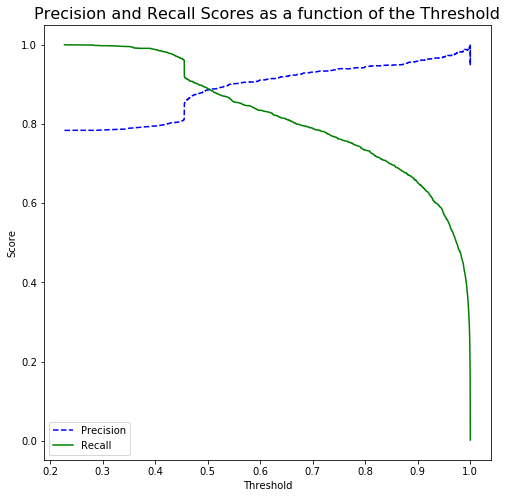

In [54]:
precision, recall, thresholds = precision_recall_curve(y_test[:,1], y_prob_test)
plot_precision_recall_vs_threshold(precision, recall, thresholds)


 clasification report:
               precision    recall  f1-score   support

non-melanoma       0.59      0.59      0.59       544
    melanoma       0.89      0.89      0.89      1960

    accuracy                           0.82      2504
   macro avg       0.74      0.74      0.74      2504
weighted avg       0.82      0.82      0.82      2504

-----------------------------------------------


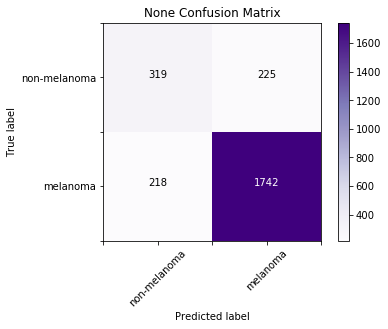

In [42]:
plot_confusion_matrix(y_test[:,1], y_pred_c_test, ['non-melanoma', 'melanoma'])

In [46]:
threshold = 0.76

In [47]:
y_prob_temp = y_prob_test

y_prob_adj = []
for y in y_prob_temp: 
    if y <= (1-threshold):
        y=0
        y_prob_adj.append(y)
    else:
        y=1
        y_prob_adj.append(y)

In [50]:
cm_adj = confusion_matrix(y_test[:,1], y_prob_adj)
cm_adj

array([[   4,  540],
       [   1, 1959]])

In [49]:
# tpr = 
# fpr = 

SyntaxError: invalid syntax (<ipython-input-49-7b48f16ec81d>, line 1)


 clasification report:
               precision    recall  f1-score   support

non-melanoma       0.80      0.01      0.01       544
    melanoma       0.78      1.00      0.88      1960

    accuracy                           0.78      2504
   macro avg       0.79      0.50      0.45      2504
weighted avg       0.79      0.78      0.69      2504

-----------------------------------------------


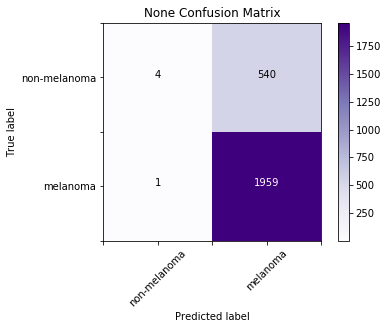

In [51]:
plot_confusion_matrix(y_test[:,1], y_prob_adj, ['non-melanoma', 'melanoma'])